In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
df = pd.read_csv('./data/train/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23501 entries, 0 to 23500
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        23501 non-null  int64 
 1   sequence        23501 non-null  int64 
 2   video_frame     23501 non-null  int64 
 3   sequence_frame  23501 non-null  int64 
 4   image_id        23501 non-null  object
 5   annotations     23501 non-null  object
dtypes: int64(4), object(2)
memory usage: 1.1+ MB


In [2]:
print(df.head(100))
#df.to_csv('mytrain.csv')

    video_id  sequence  video_frame  sequence_frame image_id  \
0          0     40258            0               0      0-0   
1          0     40258            1               1      0-1   
2          0     40258            2               2      0-2   
3          0     40258            3               3      0-3   
4          0     40258            4               4      0-4   
..       ...       ...          ...             ...      ...   
95         0     40258           95              95     0-95   
96         0     40258           96              96     0-96   
97         0     40258           97              97     0-97   
98         0     40258           98              98     0-98   
99         0     40258           99              99     0-99   

                                          annotations  
0                                                  []  
1                                                  []  
2                                                  []  
3      

# Data Analysis

In [3]:
freq = df.groupby(['video_id']).count()
count = []
for i in freq['sequence']:
    count.append(i)
print(count)
video_id = df['video_id'].unique()
print(video_id)
print(freq)

[6708, 8232, 8561]
[0 1 2]
          sequence  video_frame  sequence_frame  image_id  annotations
video_id                                                              
0             6708         6708            6708      6708         6708
1             8232         8232            8232      8232         8232
2             8561         8561            8561      8561         8561


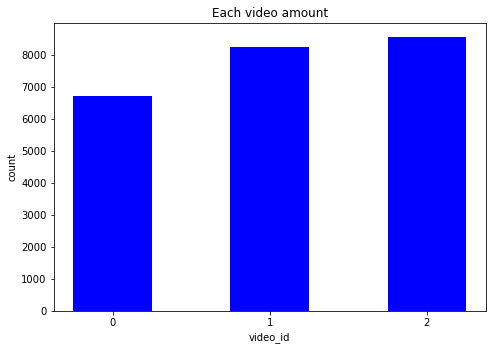

[6708, 8232, 8561]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(video_id)
ax.bar(video_id, count, color='b', width=0.5)
plt.title('Each video amount')
plt.xlabel('video_id')
plt.ylabel('count')
plt.show()
print(count)
# ax.yaxis.grid(True)

# Exploratory Data Analysis (EDA)

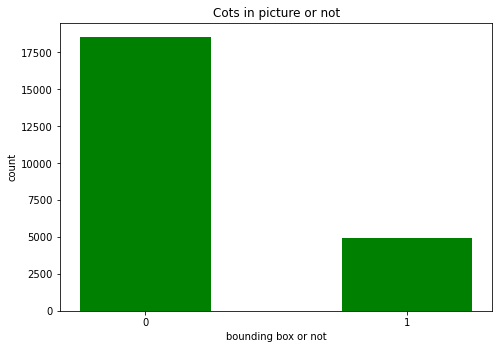

Total of no Cots images : 18582
Total of Cots images : 4919


In [5]:
count = []
for i in df['annotations']:
    if i == '[]':
        count.append(0)
    else:
        count.append(1)
cots = count.count(1)
noCots = count.count(0)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks([0,1])
ax.bar([0,1], [noCots, cots], color='g', width=0.5)
plt.title('Cots in picture or not')
plt.xlabel('bounding box or not')
plt.ylabel('count')
plt.show()
print(f'Total of no Cots images : {noCots}')
print(f'Total of Cots images : {cots}')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 

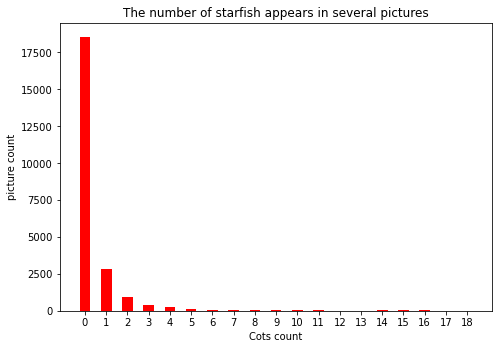

[18582, 2801, 942, 374, 240, 134, 59, 61, 58, 32, 26, 44, 17, 19, 22, 40, 28, 19, 3]


In [6]:
count = []
count1 = []
for i in df['annotations']:
    if i == '[]':
        count.append(0)
    else:
        count.append(i.count('{'))
print(count)
for i in range(max(count)+1):
    count1.append(count.count(i))
x_pos = np.arange(max(count)+1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(x_pos)
ax.bar(x_pos, count1, color='r', width=0.5)
plt.title('The number of starfish appears in several pictures')
plt.xlabel('Cots count')
plt.ylabel('picture count')
plt.show()
print(count1)
# ax.yaxis.grid(True)

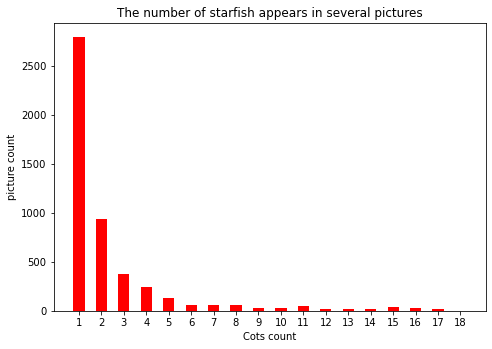

[2801, 942, 374, 240, 134, 59, 61, 58, 32, 26, 44, 17, 19, 22, 40, 28, 19, 3]


In [7]:
count1.pop(0)
x_pos = np.arange(1, max(count)+1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(x_pos)
ax.bar(x_pos, count1, color='r', width=0.5)
plt.title('The number of starfish appears in several pictures')
plt.xlabel('Cots count')
plt.ylabel('picture count')
plt.show()
print(count1)

In [8]:
dir="./data/train_images"
df['image_path'] =dir + "/video_" + df['video_id'].astype(str) + "/" + df['video_frame'].astype(str) + ".jpg"
df['image_path'] 

0            ./data/train_images/video_0/0.jpg
1            ./data/train_images/video_0/1.jpg
2            ./data/train_images/video_0/2.jpg
3            ./data/train_images/video_0/3.jpg
4            ./data/train_images/video_0/4.jpg
                         ...                  
23496    ./data/train_images/video_2/10755.jpg
23497    ./data/train_images/video_2/10756.jpg
23498    ./data/train_images/video_2/10757.jpg
23499    ./data/train_images/video_2/10758.jpg
23500    ./data/train_images/video_2/10759.jpg
Name: image_path, Length: 23501, dtype: object

In [9]:
bounding_box1 = []
for id in range(len(df["annotations"])):
    bb=df["annotations"][id]
    cots_amont = bb.count('}')
    bb = bb.strip('[]')
    bc = []
    j=0

    for i in range(len(bb)):
        if bb[i] == '}':
            bc.append( bb[j:i+1])
            j = i+3
    bd = []
    for i in range(cots_amont):
        c = eval(bc[i])
        bb_cordinate=[]
        bb_cordinate.append(c.get("x"))
        bb_cordinate.append(c.get("y"))
        bb_cordinate.append(c.get("x")+c.get("width"))
        bb_cordinate.append(c.get("y")+c.get("height"))
        bd.append(bb_cordinate)    
    bounding_box1.append(bd)
df = df.assign(bounding_box = bounding_box1)

In [10]:
df

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path,bounding_box
0,0,40258,0,0,0-0,[],./data/train_images/video_0/0.jpg,[]
1,0,40258,1,1,0-1,[],./data/train_images/video_0/1.jpg,[]
2,0,40258,2,2,0-2,[],./data/train_images/video_0/2.jpg,[]
3,0,40258,3,3,0-3,[],./data/train_images/video_0/3.jpg,[]
4,0,40258,4,4,0-4,[],./data/train_images/video_0/4.jpg,[]
...,...,...,...,...,...,...,...,...
23496,2,29859,10755,2983,2-10755,[],./data/train_images/video_2/10755.jpg,[]
23497,2,29859,10756,2984,2-10756,[],./data/train_images/video_2/10756.jpg,[]
23498,2,29859,10757,2985,2-10757,[],./data/train_images/video_2/10757.jpg,[]
23499,2,29859,10758,2986,2-10758,[],./data/train_images/video_2/10758.jpg,[]


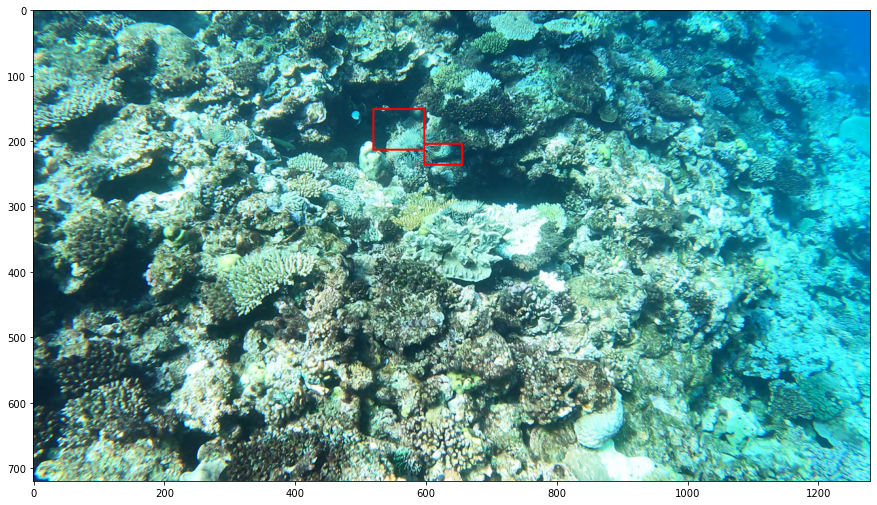

In [15]:
def plot_img(img):
 
  plt.figure(figsize = (15 , 15))
  plt.imshow(img)
  plt.show()
def show_img(img, bigger=False):
    if bigger:
        plt.figure(figsize=(15,15)) 
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()
# 
id=35

bb = df['bounding_box'][id]
# print(bb)
# print(bb[0][1])


img = cv2.imread('./data/train_images/video_0/47.jpg') 

# drawwing rectangle bounding box on image for bounding box 1 & 2
for i in range(len(bb)):
    img=cv2.rectangle(img, (bb[i][0], bb[i][1]),(bb[i][2], bb[i][3]),(0,0,255), 2)
show_img(img, bigger = True)

